In [1]:
import pandas as pd
import sklearn.manifold
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import matplotlib.cm as cm
%matplotlib inline

In [2]:
data = LineSentence('train.txt')
model = Word2Vec(data, size=200, window=5, min_count=5, workers=8, sg=1)

In [3]:
## Done only once to avoid saving same data multiple time.
## Uncomment below line if you need to save the model.
# model.save('skipgram_model')

model = Word2Vec.load('skipgram_model')

In [4]:
model.wv.most_similar('king')

[('prince', 0.7544307708740234),
 ('sultan', 0.7267563343048096),
 ('crown', 0.7264354228973389),
 ('fahd', 0.7182847857475281),
 ('luc', 0.7177212238311768),
 ('andrei', 0.7162190675735474),
 ('nasser', 0.7158470153808594),
 ('patriarch', 0.7123072147369385),
 ('gyanendra', 0.7103949785232544),
 ('veteran', 0.7085276246070862)]

In [31]:
# Visualization using tsne plots:
# Reduce dimensions to 2 to visualize the data
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.vectors
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

# Creating a dataframe with all the words and their coordinates for a manual
# visualization in converted dimensions.
points = pd.DataFrame([
    (word, coords[0], coords[1])
    for word, coords in [
        (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
        for word in model.wv.vocab
    ]
],
    columns=["word", "x", "y"]
)
points.head(10)

word          x          y
0  musharraf -24.137060 -47.101723
1          s -11.369534 -21.461048
2       last -47.464577  -6.312551
3        act  33.350544  -0.762980
4  desperate  23.003979 -12.145796
5         to  15.922504  10.068532
6       hold -29.950783  20.120333
7       onto -20.809996  21.698830
8      power  29.092804 -14.991401
9     pervez -24.147087 -46.788383

<AxesSubplot:title={'center':'Complete embedding space TSNE plot'}, xlabel='x', ylabel='y'>

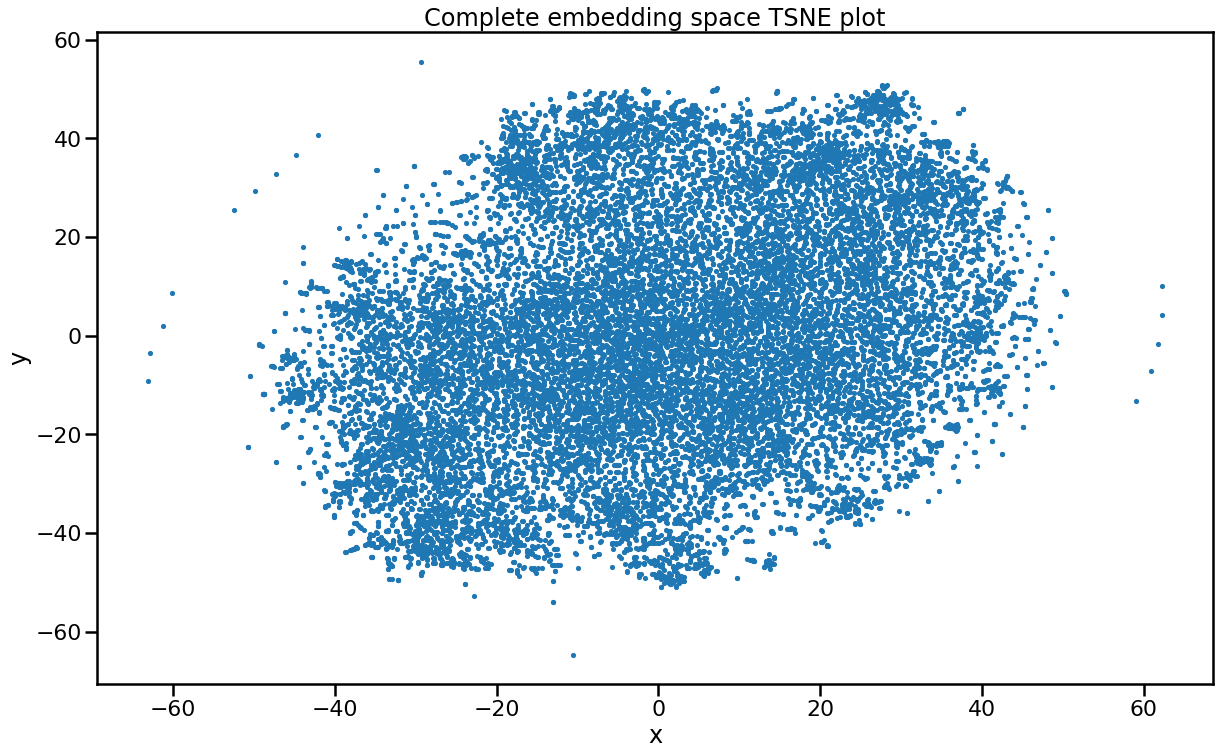

In [32]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12), title="Complete embedding space TSNE plot")

In [12]:
# Preparing data to use for most similar TSNE and PCA plots.
keys = ['king', 'pakistan', 'majority', 'stability', 'alignment', 'post', 'civilian', 'intelligence',
'disoriented', 'murder', 'languished', 'exile', 'politics', 'bowing', 'nuclear', 'operations']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [13]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

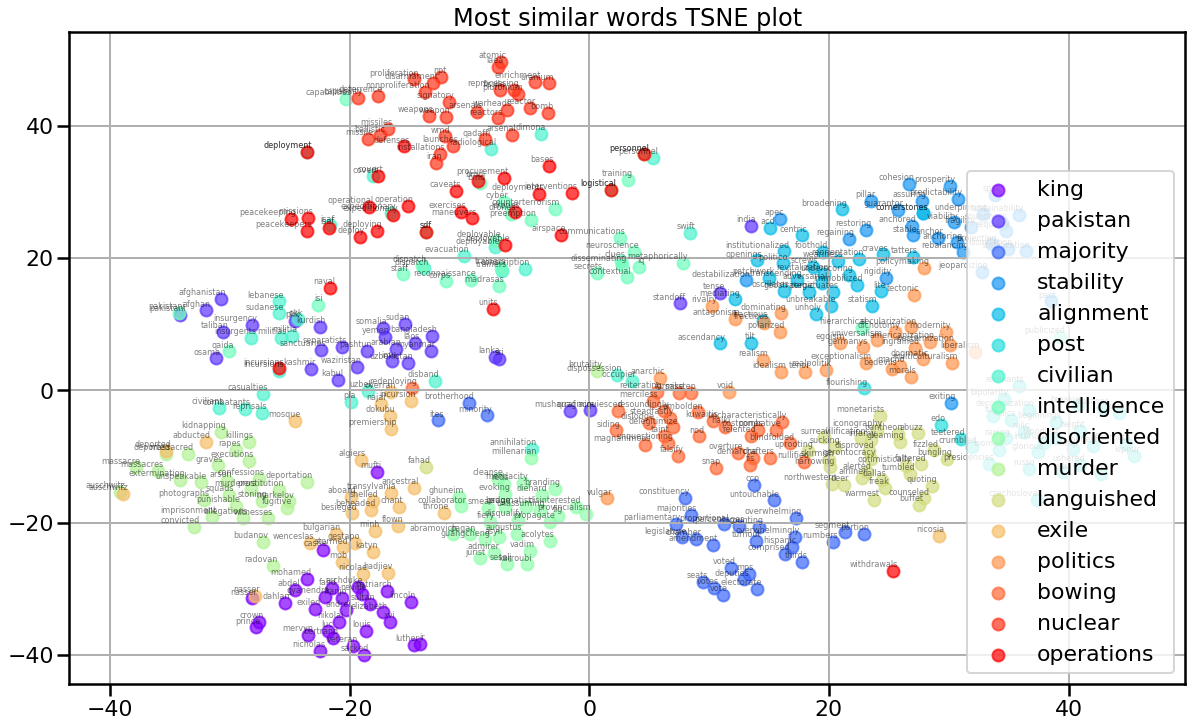

In [43]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 12))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Most similar words TSNE plot', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_tsne_skipgram.png')

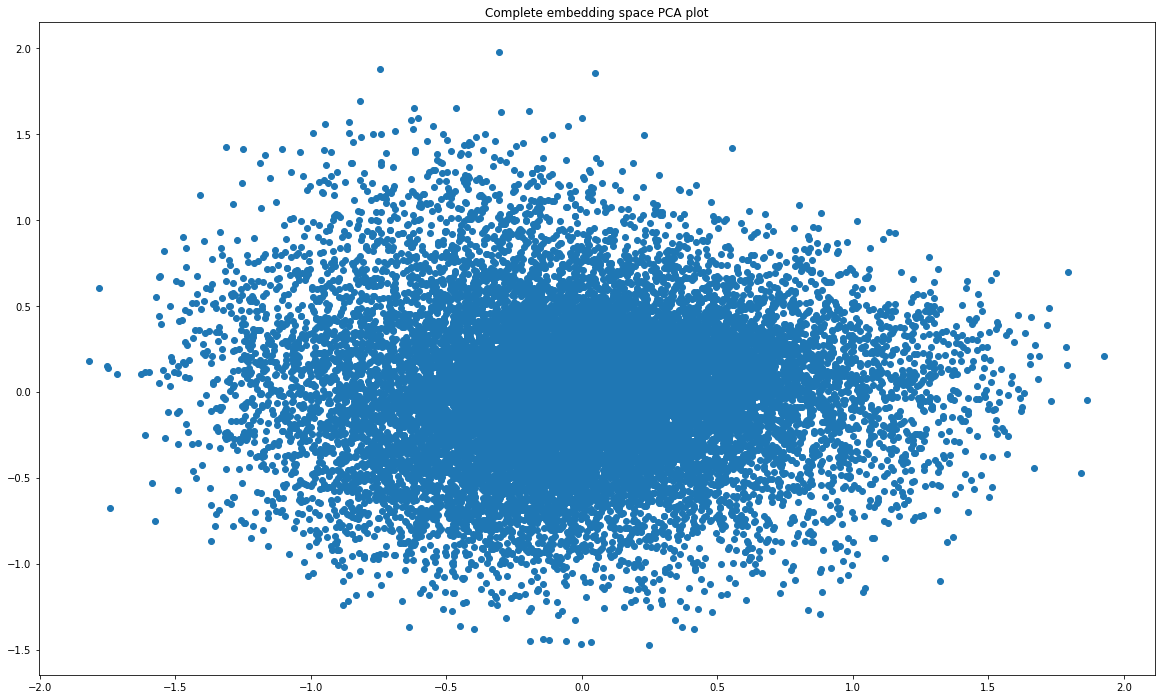

In [27]:
from sklearn.decomposition import PCA
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize=(20,12))
plt.title("Complete embedding space PCA plot")
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
plt.show()

In [35]:
from sklearn.decomposition import PCA
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
pca_model_en_2d = PCA(n_components=2)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

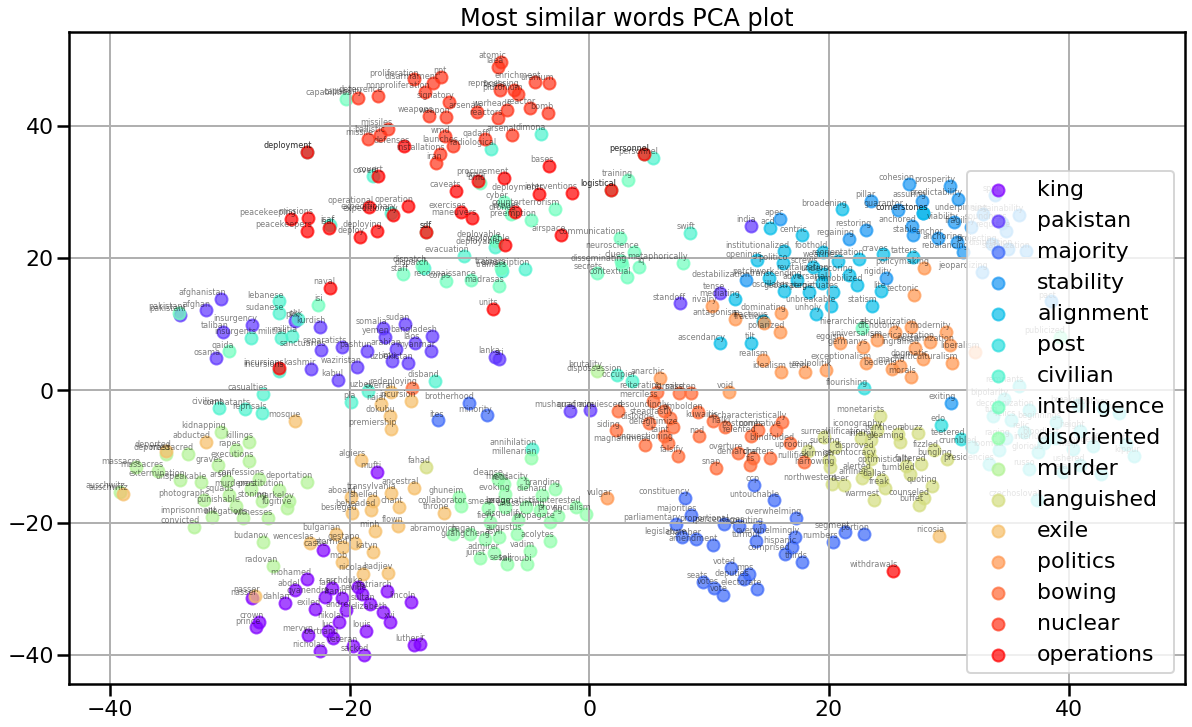

In [42]:
def pca_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 12))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


pca_plot_similar_words('Most similar words PCA plot', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_pca_skipgram.png')